In [55]:
%matplotlib inline

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pylab as pl
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics as metrics
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.ensemble import VotingRegressor as vr
from sklearn.model_selection import GridSearchCV
import torch
from torch.utils.data import DataLoader, Dataset

# from keras.models import Sequential

warnings.filterwarnings('ignore')
torch.set_default_tensor_type(t = torch.DoubleTensor)

<h1>A)</h1>

In [57]:
df = pd.read_csv("Attachments/Q4_Dataset/houses.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<h1>B)</h1>

In [59]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [60]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h1>C)</h1>

<AxesSubplot:>

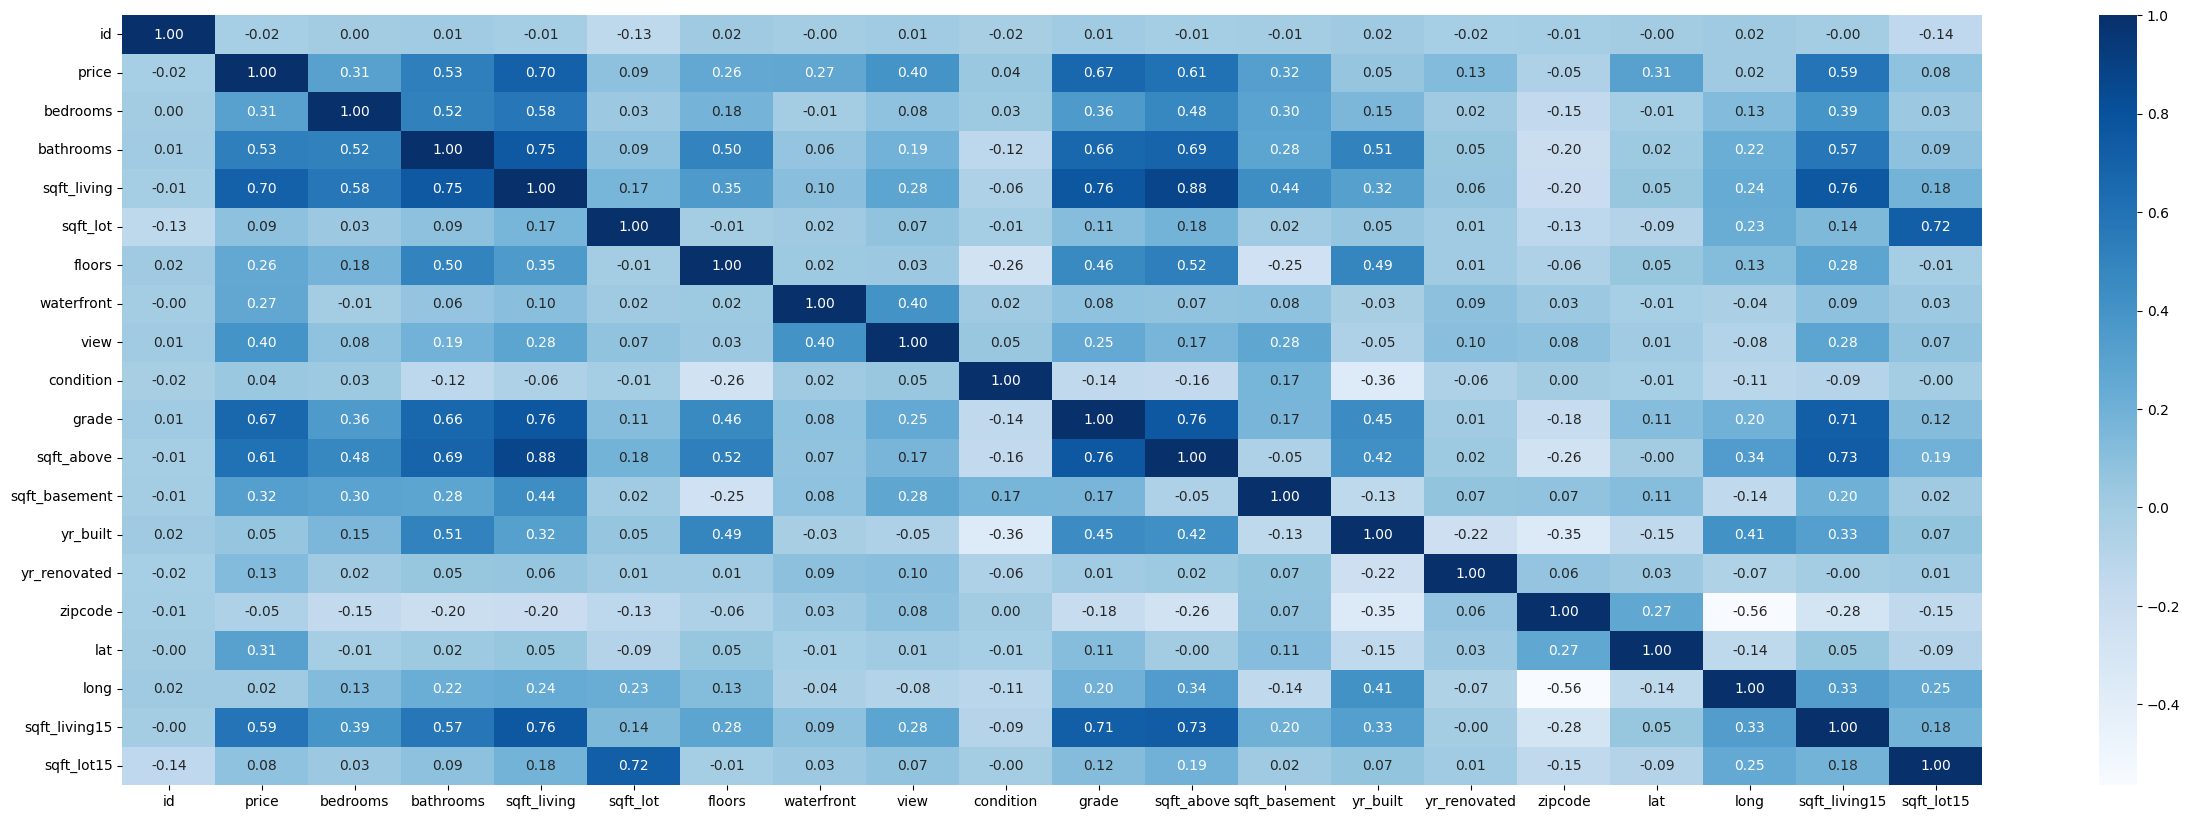

In [61]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr,annot = True,fmt = '.2f',cmap = 'Blues',ax=ax)

In [62]:
corr.style.background_gradient(cmap ='Blues') 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<h1>D)</h1>

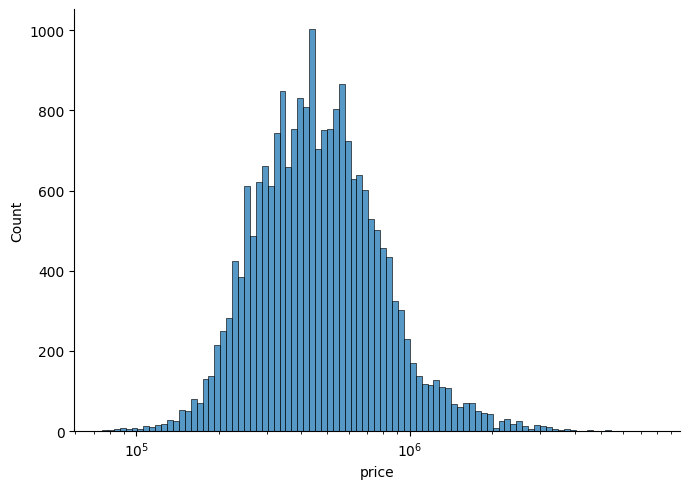

In [63]:
sns.displot(
  data=df['price'],
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins='auto'
)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

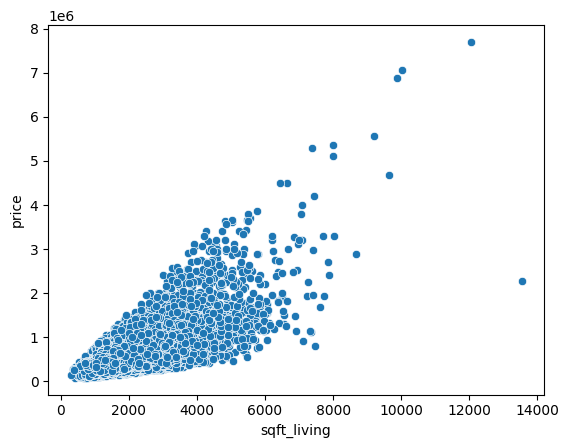

In [64]:
sns.scatterplot(data=df, x="sqft_living", y="price")

<h1>E)</h1>

In [65]:
df['month']=pd.to_datetime(df.date).dt.month
df['year']=pd.to_datetime(df.date).dt.year

In [66]:
df.drop(columns=['date', 'id', 'zipcode'], inplace=True)

<h1>F)</h1>

In [67]:
pivot = np.random.rand(len(df)) <= 0.8
x_train = df[pivot]
y_train = x_train['price']
x_test = df[~pivot]
y_test = x_test['price']
x_train.drop(columns='price', inplace=True)
x_test.drop(columns='price', inplace=True)
# print(x_train)
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values


In [68]:
x_train

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 1.000e+01,
        2.014e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.000e+00,
        2.015e+03],
       [4.000e+00, 3.000e+00, 1.960e+03, ..., 5.000e+03, 1.200e+01,
        2.014e+03],
       ...,
       [4.000e+00, 2.500e+00, 2.310e+03, ..., 7.200e+03, 2.000e+00,
        2.015e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 1.000e+00,
        2.015e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 1.000e+01,
        2.014e+03]])

In [69]:
x_test

array([[3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 1.200e+01,
        2.014e+03],
       [4.000e+00, 3.000e+00, 2.950e+03, ..., 4.000e+03, 1.000e+00,
        2.015e+03],
       [2.000e+00, 1.000e+00, 1.200e+03, ..., 5.095e+03, 1.200e+01,
        2.014e+03],
       ...,
       [4.000e+00, 2.500e+00, 2.520e+03, ..., 6.023e+03, 1.000e+01,
        2.014e+03],
       [3.000e+00, 2.500e+00, 1.310e+03, ..., 1.265e+03, 2.000e+00,
        2.015e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 6.000e+00,
        2.014e+03]])

In [70]:
y_train

array([221900., 180000., 604000., ..., 400000., 400000., 325000.])

In [71]:
y_test

array([538000., 650000., 189000., ..., 610685., 475000., 402101.])

<h1>G)</h1>

In [72]:
scaler = mms()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[9.09090909e-02, 1.25000000e-01, 6.15034169e-02, ...,
        5.74235339e-03, 8.18181818e-01, 0.00000000e+00],
       [6.06060606e-02, 1.25000000e-01, 3.03720577e-02, ...,
        8.51301880e-03, 9.09090909e-02, 1.00000000e+00],
       [1.21212121e-01, 3.75000000e-01, 1.20728929e-01, ...,
        4.99569812e-03, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.21212121e-01, 3.12500000e-01, 1.47304480e-01, ...,
        7.52283904e-03, 9.09090909e-02, 1.00000000e+00],
       [9.09090909e-02, 3.12500000e-01, 9.33940774e-02, ...,
        7.30573466e-04, 0.00000000e+00, 1.00000000e+00],
       [6.06060606e-02, 9.37500000e-02, 4.93545938e-02, ...,
        8.10982495e-04, 8.18181818e-01, 0.00000000e+00]])

In [73]:
class HouseDataset(Dataset):
    def __init__(self, x, y):
        assert x.shape[0] == y.shape[0]
        self.x = torch.from_numpy(x.astype(np.float64))
        self.y = torch.from_numpy(y.astype(np.float64))
        
    def __getitem__(self, index):
        return self.x[index, :], self.y[index]
    
    def __len__(self):
        return self.x.shape[0]

In [74]:
train_dataset = HouseDataset(x_train, y_train)
test_dataset = HouseDataset(x_test, y_test)

In [75]:
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=16,
                              shuffle=True,
                              num_workers=2)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=16)

## H)
Make a MLP model with two or more hidden layer

In [163]:
class MLP(torch.nn.Module):
    def __init__(self, hidden_dim = (128, 64)):
        super().__init__()
        self.linear1 = torch.nn.Linear(19, hidden_dim[0])
        self.activation = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(hidden_dim[0], hidden_dim[1])
        self.linear3 = torch.nn.Linear(hidden_dim[1], 1)
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x   

In [77]:
torch.rand((3,3))

tensor([[0.5097, 0.4688, 0.3684],
        [0.2686, 0.7802, 0.2916],
        [0.0894, 0.5688, 0.0091]])

In [173]:
model1 = MLP((128,64))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)

In [174]:
n_epochs = 50
losses = []
for epoch in range(n_epochs):
    for i, (x, y) in enumerate(train_dataloader):
        y_predicted = model1(x)

        loss = criterion(y_predicted, y)
        
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
    
    losses.append(loss.item())
    if (epoch+1) % 5 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 5, loss = 194229899845.9240
epoch: 10, loss = 56331331691.3352
epoch: 15, loss = 165121395693.0338
epoch: 20, loss = 57419600757.4637
epoch: 25, loss = 91521572864.2437
epoch: 30, loss = 80169655200.8681
epoch: 35, loss = 93122592582.5784
epoch: 40, loss = 45680820637.2372
epoch: 45, loss = 48300866637.4649
epoch: 50, loss = 41572754893.8254


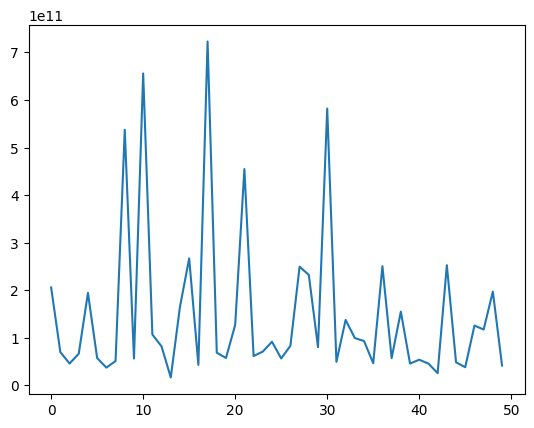

In [175]:
plt.plot(losses)

In [98]:
losses = []
with torch.no_grad():
    for (x, y) in test_dataloader:
        y_predicted = model1(x)
        
        loss = criterion(y_predicted, y)
        losses.append(loss.item())

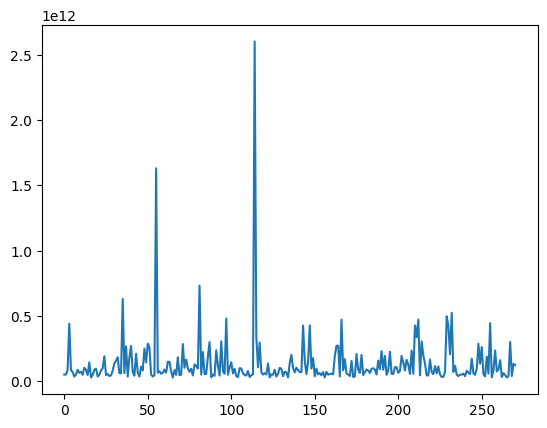

In [99]:
plt.plot(losses)

In [160]:
model2 = MLP((256, 128))
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.05)

In [161]:
n_epochs = 50
losses = []
for epoch in range(n_epochs):
    for i, (x, y) in enumerate(train_dataloader):
        y_predicted = model2(x)
        loss = criterion(y_predicted, y)
        
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
    
    losses.append(loss.item())
    if (epoch+1) % 5 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 5, loss = 317848.0651
epoch: 10, loss = 304773.4323
epoch: 15, loss = 180457.7392
epoch: 20, loss = 168253.6756
epoch: 25, loss = 138912.0953
epoch: 30, loss = 335109.3561
epoch: 35, loss = 231654.1527
epoch: 40, loss = 214044.3324
epoch: 45, loss = 352484.2917
epoch: 50, loss = 168770.2189


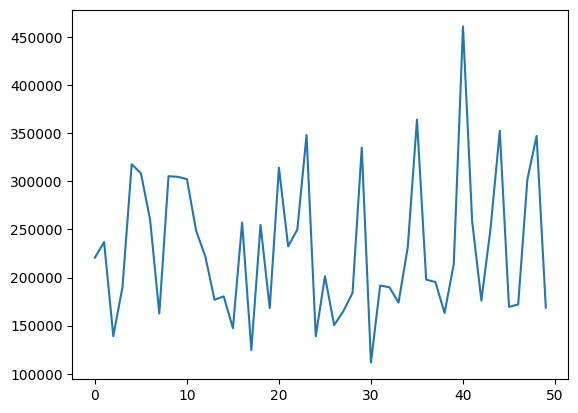

In [162]:
plt.plot(losses)

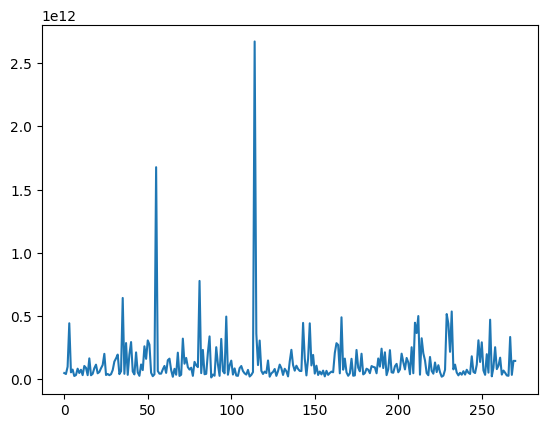

In [178]:
losses = []
with torch.no_grad():
    for (x, y) in test_dataloader:
        y_predicted = model1(x)
        
        loss = criterion(y_predicted, y)
        losses.append(loss.item())
plt.plot(losses)

In [176]:
test_iter = iter(test_dataloader)
x, y = next(test_iter)

output = model2(x)
output[0:2]

tensor([[462355.1041],
        [461214.0856]], grad_fn=<SliceBackward0>)

In [177]:
y[0:2]

tensor([538000., 650000.])